In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date, timedelta

In [6]:
# Read Data
top_200_2019 = pd.read_csv('../data/streams_2019-01-01__2020-01-01.csv')
song_features_2019 = pd.read_csv('../data/song_features_2019-01-01__2020-01-01.csv')
top_200_2019 = top_200_2019.merge(song_features_2019, on=['track_id'])
top_200_2019.head(50)

,Position,Track Name,Artist,Streams,URL,date,region,track_id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,mode,valence
0,1,"thank u, next",Ariana Grande,3978028,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-01,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,106.960,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435
1,2,"thank u, next",Ariana Grande,4275439,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-02,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,106.960,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435
2,2,"thank u, next",Ariana Grande,4320260,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-03,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,106.960,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435
3,2,"thank u, next",Ariana Grande,4385311,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-04,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,106.960,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435
4,2,"thank u, next",Ariana Grande,4194463,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-05,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,106.960,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435
5,2,"thank u, next",Ariana Grande,3872308,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-06,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,106.960,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435
6,3,"thank u, next",Ariana Grande,4266029,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-07,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,106.960,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435
7,3,"thank u, next",Ariana Grande,4282739,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-08,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,106.960,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435
8,3,"thank u, next",Ariana Grande,4270395,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-09,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,106.960,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435
9,3,"thank u, next",Ariana Grande,4224520,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-10,Global,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,106.960,0.0658,0.280,0.0,0.724,1,207333,-5.642,1,0.435


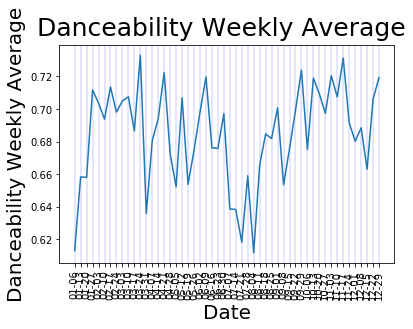

In [7]:
# Danceability parameter
dates = [date for date in top_200_2019['date'].unique()]
danceability_avg = []

for date in dates:
    daily_chart = top_200_2019[top_200_2019['date'] == date]
    danceability_avg.append(daily_chart.nlargest(5, ['Position'])['danceability'].mean())
    
weeks_average = []
count = 0
i = 0
currSum = 0
while i < len(dates):
    currSum += danceability_avg[i]
    count += 1
    if count == 7:
        weeks_average.append(currSum / count)
        currSum = 0
        count = 0
    i += 1

def allsundays(year):
   d = datetime.date(year, 1, 1)                    
   d += timedelta(days = 6 - d.weekday()) 
   while d.year == year:
      yield d
      d += timedelta(days = 7)

days = []
for i in allsundays(2019):
    days.append(i.strftime('%m-%d'))
plt.plot([i for i in days], weeks_average)
plt.xticks([i for i in days],  rotation='vertical')
plt.grid(color='b', linestyle='-', linewidth=0.2, axis='x')
plt.rcParams["figure.figsize"] = (30,15)
plt.suptitle('Danceability Weekly Average', fontsize=25)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Danceability Weekly Average', fontsize=20)
plt.show()

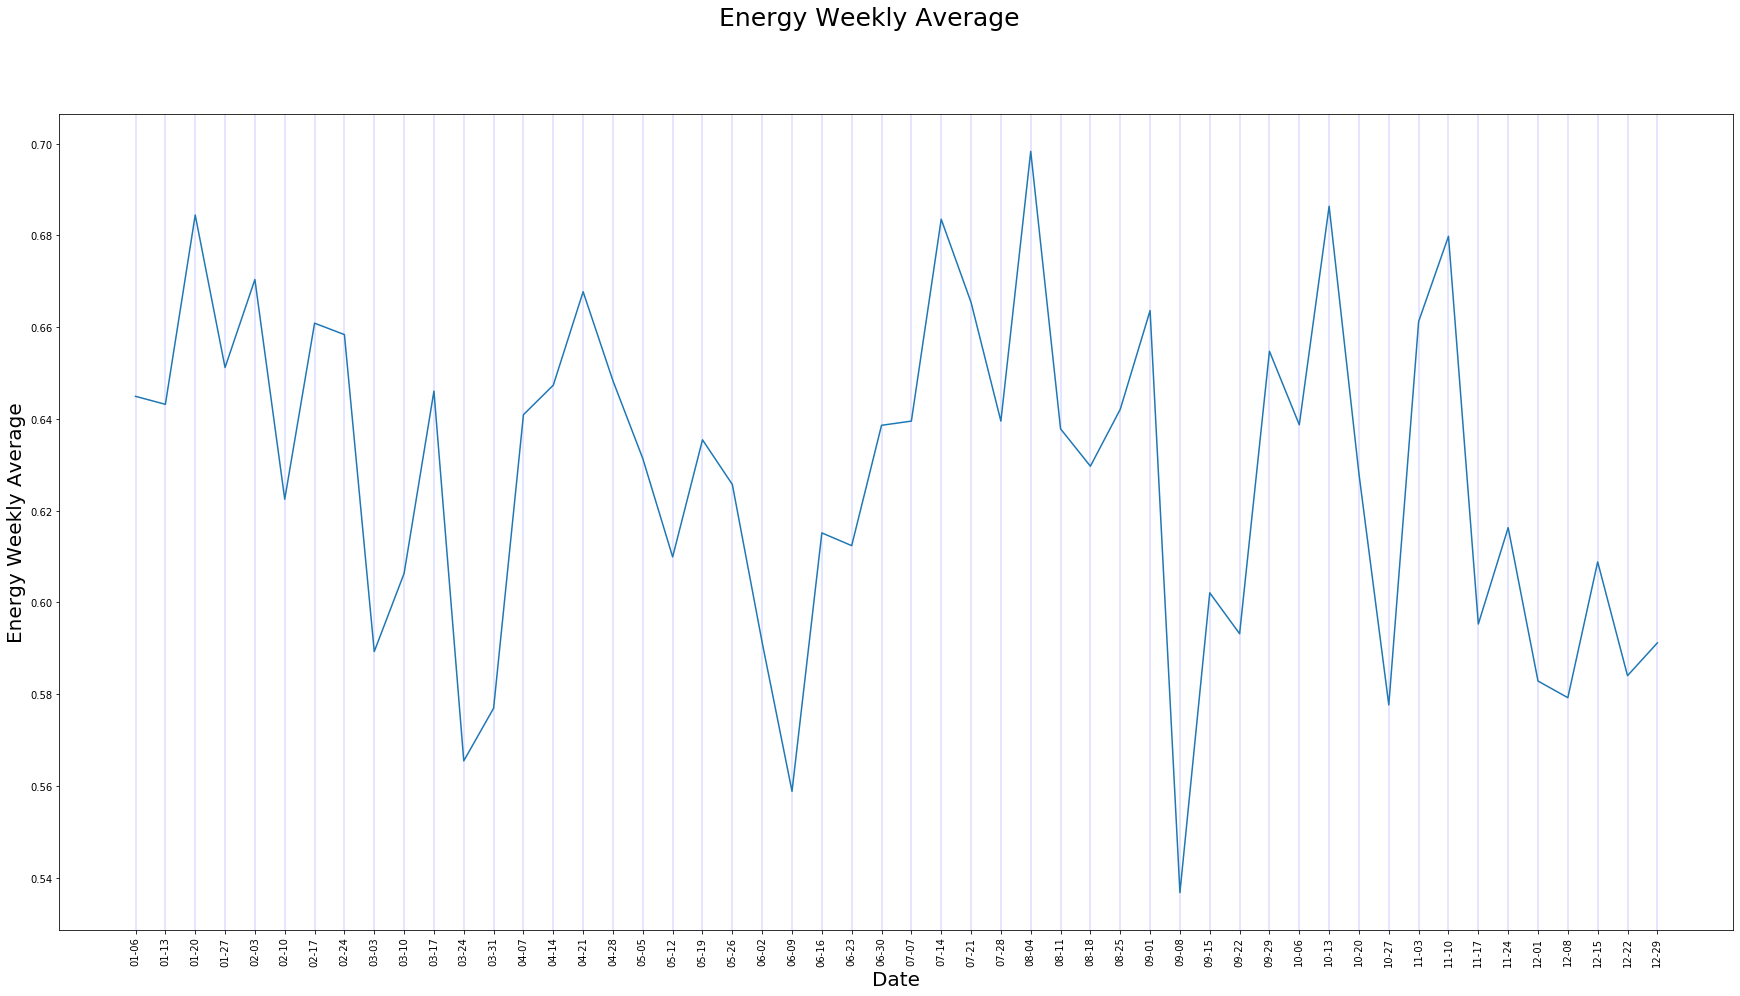

In [8]:
# Energy parameter

dates = [date for date in top_200_2019['date'].unique()]
energy_avg = []

for date in dates:
    daily_chart = top_200_2019[top_200_2019['date'] == date]
    energy_avg.append(daily_chart.nlargest(5, ['Position'])['energy'].mean())
    
weeks_average = []
count = 0
i = 0
currSum = 0
while i < len(dates):
    currSum += energy_avg[i]
    count += 1
    if count == 7:
        weeks_average.append(currSum / count)
        currSum = 0
        count = 0
    i += 1

def allsundays(year):
   d = datetime.date(year, 1, 1)        
   d += timedelta(days = 6 - d.weekday())
   while d.year == year:
      yield d
      d += timedelta(days = 7)

days = []
for i in allsundays(2019):
    days.append(i.strftime('%m-%d'))
plt.plot([i for i in days], weeks_average)
plt.xticks([i for i in days],  rotation='vertical')
plt.grid(color='b', linestyle='-', linewidth=0.2, axis='x')
plt.rcParams["figure.figsize"] = (30,15)
plt.suptitle('Energy Weekly Average', fontsize=25)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Energy Weekly Average', fontsize=20)
plt.show()

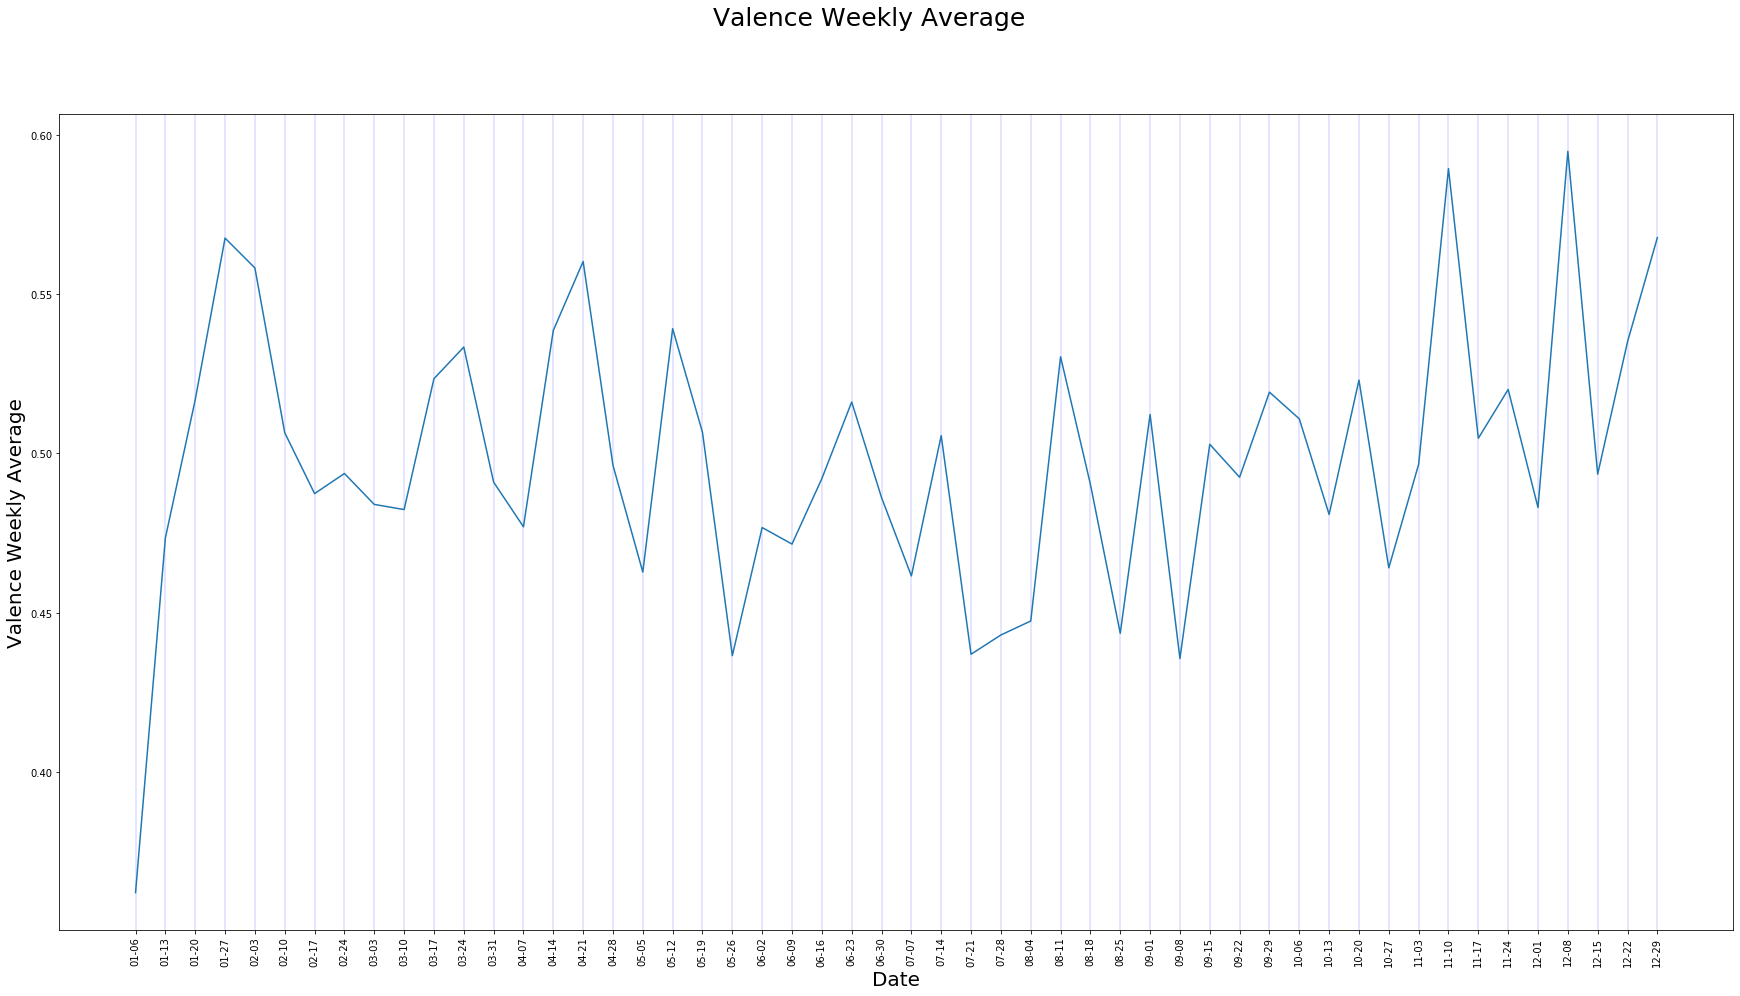

In [9]:
# Valence parameter
dates = [date for date in top_200_2019['date'].unique()]
valence_avg = []

for date in dates:
    daily_chart = top_200_2019[top_200_2019['date'] == date]
    valence_avg.append(daily_chart.nlargest(5, ['Position'])['valence'].mean())
    
weeks_average = []
count = 0
i = 0
currSum = 0
while i < len(dates):
    currSum += valence_avg[i]
    count += 1
    if count == 7:
        weeks_average.append(currSum / count)
        currSum = 0
        count = 0
    i += 1

def allsundays(year):
   d = datetime.date(year, 1, 1)                
   d += timedelta(days = 6 - d.weekday())  
   while d.year == year:
      yield d
      d += timedelta(days = 7)

days = []
for i in allsundays(2019):
    days.append(i.strftime('%m-%d'))
plt.plot([i for i in days], weeks_average)
plt.xticks([i for i in days],  rotation='vertical')
plt.grid(color='b', linestyle='-', linewidth=0.2, axis='x')
plt.rcParams["figure.figsize"] = (30,15)
plt.suptitle('Valence Weekly Average', fontsize=25)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Valence Weekly Average', fontsize=20)
plt.show()

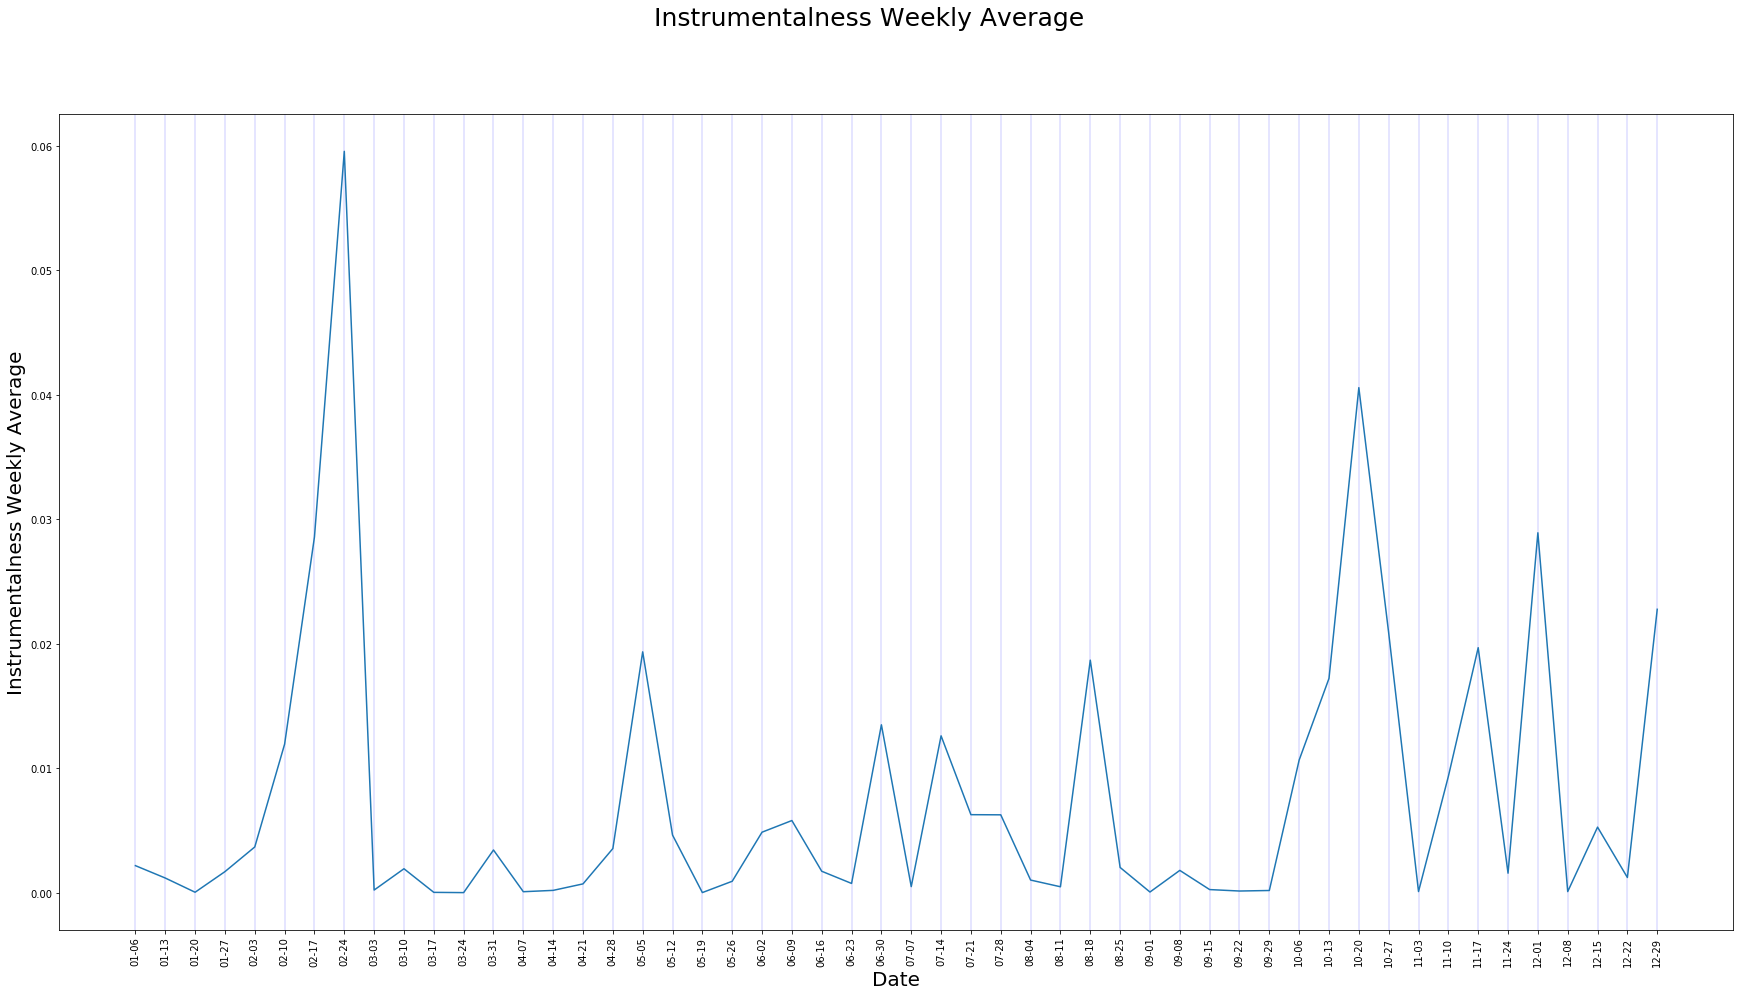

In [11]:
# Instrumentalness parameter
dates = [date for date in top_200_2019['date'].unique()]
instrumentalness_avg = []

for date in dates:
    daily_chart = top_200_2019[top_200_2019['date'] == date]
    instrumentalness_avg.append(daily_chart.nlargest(5, ['Position'])['instrumentalness'].mean())
    
weeks_average = []
count = 0
i = 0
currSum = 0
while i < len(dates):
    currSum += instrumentalness_avg[i]
    count += 1
    if count == 7:
        weeks_average.append(currSum / count)
        currSum = 0
        count = 0
    i += 1

def allsundays(year):
   d = datetime.date(year, 1, 1)                    
   d += timedelta(days = 6 - d.weekday()) 
   while d.year == year:
      yield d
      d += timedelta(days = 7)

days = []
for i in allsundays(2019):
    days.append(i.strftime('%m-%d'))
plt.plot([i for i in days], weeks_average)
plt.xticks([i for i in days],  rotation='vertical')
plt.grid(color='b', linestyle='-', linewidth=0.2, axis='x')
plt.rcParams["figure.figsize"] = (30,15)
plt.suptitle('Instrumentalness Weekly Average', fontsize=25)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Instrumentalness Weekly Average', fontsize=20)
plt.show()